### Preparing to measure time and memory usage

In [2]:
library(peakRAM)

my_func <- function() {
    # código para mensuração do tempo e memória
    for(i in 1:5) {
        mean(rnorm(1e1))
    } 

}

mem.obj <- peakRAM(myfunc)

time_elapsed <- mem.obj$Elapsed_Time_sec
memory_used <- mem.obj$Peak_RAM_Used_MiB

print(time_elapsed)
print(memory_used)

[1] "Hi"
[1] 0
[1] 0


### 0. Installing libraries

In [ ]:
## basic DNA manipulation
# if(!require('BiocManager', quietly=TRUE))
#   install.packages(BiocManager)
# BiocManager::install('Biostrings')

## downloading data from NCBI
# install.packages('rentrez')

- Searching for help

In [ ]:
?pairwiseAlignment

### Sequence transformation and editing
- Biostrings: https://doi.org/10.18129/B9.bioc.Biostrings

In [5]:
library(Biostrings)

Carregando pacotes exigidos: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Carregando pacotes exigidos: S4Vectors

Carregando pacotes exigidos: stats4


Attaching package: 'S4Vectors'


The following object is masked from 'package:utils':

    findMatches


The following objects are masked from 'package:base':

    expand.grid, I, unname


Carregando pacotes exigidos: IRanges


Attaching package: 'IRanges'


The following object is masked from 'pac

In [10]:
seqTransfEdit <- function() {
    dna_seq <- DNAString('ATCGAG') # creating DNAString object -> instance of class DNAString

    rna_seq <- RNAString(gsub('T', 'U', as.character(dna_seq)))
    rev <- rev(dna_seq)
    compl <- complement(dna_seq)
    rev_compl <- reverseComplement(dna_seq)
    protein_seq <- translate(dna_seq)

    print(rna_seq)
    print(rev)
    print(compl)
    print(rev_compl)
    print(protein_seq)
}

mem.obj <- peakRAM(seqTransfEdit)
time_elapsed <- mem.obj$Elapsed_Time_sec
memory_used <- mem.obj$Peak_RAM_Used_MiB

print(time_elapsed)
print(memory_used)

6-letter RNAString object
seq: AUCGAG
6-letter DNAString object
seq: GAGCTA
6-letter DNAString object
seq: TAGCTC
6-letter DNAString object
seq: CTCGAT
2-letter AAString object
seq: IE
[1] 0.01
[1] 0.1


### I/O Functions
- Biostrings: https://doi.org/10.18129/B9.bioc.Biostrings
- Read FASTA and FASTQ files

In [3]:
library(Biostrings)

Carregando pacotes exigidos: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Carregando pacotes exigidos: S4Vectors

Carregando pacotes exigidos: stats4


Attaching package: 'S4Vectors'


The following object is masked from 'package:utils':

    findMatches


The following objects are masked from 'package:base':

    expand.grid, I, unname


Carregando pacotes exigidos: IRanges


Attaching package: 'IRanges'


The following object is masked from 'pac

In [4]:
read_fast_files <- function () {
    path_to_fasta <- 'path_to_data/Bioinformatics/FASTA_Files/leprae.fasta'
    path_to_fastq <- 'path_to_data/Bioinformatics/FASTQ_Files/P7741_R1.fastq'

    my_fasta_seq <- readDNAStringSet(path_to_fasta, format='fasta')
    my_fastq_seqs <- readDNAStringSet(path_to_fastq, format='fastq')

    print(my_fasta_seq)
    print(my_fastq_seqs)
}

mem.obj <- peakRAM(read_fast_files())
time_elapsed <- mem.obj$Elapsed_Time_sec
memory_used <- mem.obj$Peak_RAM_Used_MiB
print(time_elapsed)
print(memory_used)

DNAStringSet object of length 1:
      width seq                                             names               
[1] 3268203 ATGTTTGTACCGCACGCCAAAA...GACAGTTACTTCGTCGTAAACC NC_002677.1 Mycob...
DNAStringSet object of length 273071:
         width seq                                          names               
     [1]   251 TCCTCGAGCTCGGTGGGCTCG...ATTTTGCATGGTTATGCAAT M01941:8:00000000...
     [2]   249 TCGCCCCACCGCCAGCAATAG...CCGAAACGACGGTATATCTG M01941:8:00000000...
     [3]   251 GTGCAGCGCACATCCCAGGTC...TCGATGAACTCCCCGGCCAG M01941:8:00000000...
     [4]    92 GGTGCCGCCAATGATGCCGTG...ATTGCGCACCAGATCATCGA M01941:8:00000000...
     [5]   251 CTGATCCACCTGGATGACCCG...CGGATGCTCAAACTGACCCA M01941:8:00000000...
     ...   ... ...
[273067]   250 ACATGGCACCGGCACCCGACT...CGCTAGAGCAGCTAGGGCTC M01938:202:000000...
[273068]   251 GTCTTGAACCCGGAAAATCCA...AATGAGCAGCCCGTAGATCG M01938:202:000000...
[273069]   251 GGGGGGGGGGGGGGGGGGGGG...GGCACGCCCGCCGCCCGGGG M01938:202:000000...
[273070]   251 GTCA

[1] 1.17
[1] 118.6


### Basic Alignment
- Biostrings: https://doi.org/10.18129/B9.bioc.Biostrings

In [3]:
library(Biostrings)

Carregando pacotes exigidos: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Carregando pacotes exigidos: S4Vectors

Carregando pacotes exigidos: stats4


Attaching package: 'S4Vectors'


The following object is masked from 'package:utils':

    findMatches


The following objects are masked from 'package:base':

    expand.grid, I, unname


Carregando pacotes exigidos: IRanges


Attaching package: 'IRanges'


The following object is masked from 'pac

In [4]:
runAlignment <- function(){
    mat <- nucleotideSubstitutionMatrix(match = 1, mismatch = 0, baseOnly = TRUE)

    alignments <- pairwiseAlignment(pattern='ACCGGT',
                                    subject='ACGT',
                                    type='global',
                                    substitutionMatrix=mat,
                                    scoreOnly=FALSE,
                                    gapOpening=0,
                                    gapExtension=0)
    print(score(alignments))
}

mem.obj <- peakRAM(runAlignment())
time_elapsed <- mem.obj$Elapsed_Time_sec
memory_used <- mem.obj$Peak_RAM_Used_MiB
print(time_elapsed)
print(memory_used)

[1] 4
[1] 0.03
[1] 1.2


### Download data from NCBI
- Mycobacterium ulcerans strain Agy99, complete sequence
    - Accession Number: NC_008611

In [3]:
library(rentrez)

In [4]:
downloadNCBI <- function () {# getting data
    record <- entrez_fetch(db='nucleotide', id='NC_008611', rettype='fasta', retmode='text')

    # writing file
    output_path <- 'path_to_data/Bioinformatics/Agy99_r.fasta'
    write(record, file=output_path)
}

mem.obj <- peakRAM(downloadNCBI())
time_elapsed <- mem.obj$Elapsed_Time_sec
memory_used <- mem.obj$Peak_RAM_Used_MiB
print(time_elapsed)
print(memory_used)

[1] 3.86
[1] 17.9


### Download data from TCGA
- TCGAbiolinks: https://gdc.cancer.gov/content/tcgabiolinks
- Maftools: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6211645/ 
- SummarizedExperiment: https://bioconductor.org/packages/release/bioc/html/SummarizedExperiment.html

In [3]:
library(TCGAbiolinks)
library(tidyverse)
library(maftools)
library(pheatmap)
library(SummarizedExperiment)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Carregando pacotes exigidos: MatrixGenerics

Carregando pacotes exigidos: matrixStats


Attaching package: 'matrixStats'


The following object is masked from 'package:dplyr':

    count



Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, col

In [4]:
# build a query to retrieve DNA methylation data
downloadTCGA <- function() {
    query_methly <- GDCquery(project='TCGA-GBM',
                             data.category='DNA Methylation',
                             platform='Illumina Human Methylation 27',
                             access='open',
                             data.type='Methylation Beta Value',
                             barcode=c('TCGA-19-0962-01B-01D-0521-05', 'TCGA-06-0137-01A-01D-0218-05'))

    output_query_methyl <- getResults(query_methly)

    GDCdownload(query_methly)
    # plot probes showing differences in beta values between samples - GDCprepare
#     dna.meth = GDCprepare(query_methly, summarizedExperiment=TRUE)
#     assay(dna.meth)

#     idx <- dna.meth %>%
#             assay %>%
#             rowVars() %>%
#             order(decreasing=TRUE) %>%
#             head(10)

#     # plot
#     pheatmap(assay(dna.meth)[idx, ])
}

mem.obj <- peakRAM(downloadTCGA())
time_elapsed <- mem.obj$Elapsed_Time_sec
memory_used <- mem.obj$Peak_RAM_Used_MiB
print(time_elapsed)
print(memory_used)

--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-GBM

--------------------

oo Filtering results

--------------------

ooo By platform

ooo By access

ooo By data.type

ooo By barcode

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases

ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------


GDCdownload will download 2 files. A total of 1.513946 MB




Downloading: 620 kB     [1] 18.69
[1] 29.8


In [2]:
gdcprojects <- getGDCprojects()

In [3]:
gdcprojects

,id,primary_site,dbgap_accession_number,project_id,disease_type,name,releasable,state,released,tumor
,<chr>,<list>,<chr>,<chr>,<list>,<chr>,<lgl>,<chr>,<lgl>,<chr>
1,CGCI-HTMCP-CC,Cervix uteri,phs000528,CGCI-HTMCP-CC,Epitheli....,HIV+ Tumor Molecular Characterization Project - Cervical Cancer,TRUE,open,TRUE,HTMCP
2,TARGET-AML,Hematopo....,phs000465,TARGET-AML,Myeloid ....,Acute Myeloid Leukemia,TRUE,open,TRUE,AML
3,GENIE-JHU,Spinal c....,NA,GENIE-JHU,Neoplasm....,AACR Project GENIE - Contributed by Johns Hopkins Sidney Kimmel Comprehensive Cancer Center,TRUE,open,TRUE,JHU
4,GENIE-MSK,"Testis, ....",NA,GENIE-MSK,Neoplasm....,AACR Project GENIE - Contributed by Memorial Sloan Kettering Cancer Center,TRUE,open,TRUE,MSK
5,GENIE-VICC,Spinal c....,NA,GENIE-VICC,Neoplasm....,AACR Project GENIE - Contributed by Vanderbilt-Ingram Cancer Center,TRUE,open,TRUE,VICC
6,GENIE-MDA,"Testis, ....",NA,GENIE-MDA,Osseous ....,AACR Project GENIE - Contributed by MD Anderson Cancer Center,TRUE,open,TRUE,MDA
7,TCGA-MESO,Bronchus....,NA,TCGA-MESO,Mesothel....,Mesothelioma,TRUE,open,TRUE,MESO
8,TARGET-ALL-P3,Hematopo....,NA,TARGET-ALL-P3,Not Appl....,Acute Lymphoblastic Leukemia - Phase III,TRUE,open,TRUE,ALL
9,TCGA-UVM,Eye and ....,NA,TCGA-UVM,Nevi and....,Uveal Melanoma,TRUE,open,TRUE,UVM


In [4]:
getProjectSummary('TCGA-BRCA')

,file_count,case_count,data_category
,<int>,<int>,<chr>
1,7562,1098,Sequencing Reads
2,5316,1098,Biospecimen
3,12066,1098,Copy Number Variation
4,17111,1098,Simple Nucleotide Variation
5,4876,1097,Transcriptome Profiling
6,3714,1097,DNA Methylation
7,2288,1098,Clinical
8,4924,1095,Structural Variation
9,919,881,Proteome Profiling


In [5]:
# building a query
query_TCGA <- GDCquery(project='TCGA-BRCA',
                       data.category='Transcriptome Profiling')
output_query_TCGA <- getResults(query_TCGA)

--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-BRCA

--------------------

oo Filtering results

--------------------

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases


ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------



In [7]:
output_query_TCGA

id,data_format,cases,access,file_name,submitter_id,data_category,type,file_size,created_datetime,⋯,analysis_id,analysis_state,analysis_submitter_id,analysis_workflow_link,analysis_workflow_type,analysis_workflow_version,sample_type,is_ffpe,cases.submitter_id,sample.submitter_id
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>
47d6918f-2214-44d5-a1dc-cf9f3f03f003,TXT,TCGA-A7-A26E-01B-06R-A27D-13,open,8282a63b-1860-4b2d-8339-ac20cffce073.mirbase21.isoforms.quantification.txt,mirna_swap_dr11_83_MirnaExpression66709d24-f664-4033-b793-9cb6a6587bd1_isoform_profiling,Transcriptome Profiling,mirna_expression,456902,2018-03-20T00:52:15.997385-05:00,⋯,1a2e396b-596e-4fd9-bc1b-57cfd6be59c9,released,mirna_swap_dr11_83_MirnaExpressionWorkflowc5800886-a277-4618-bc3e-5158378c8f76_pipeline:mirnaseq0.0.1,https://github.com/NCI-GDC/gdc-dnaseq-cwl/blob/gdc-active-submission/workflows/mirnaseq/runner.cwl,BCGSC miRNA Profiling,NA,Primary Tumor,NA,TCGA-A7-A26E,TCGA-A7-A26E-01B
a496737f-7c7e-4098-890e-07153fe9c09d,TXT,TCGA-D8-A1XU-01A-11R-A14L-13,open,9e365ec7-4d96-460d-9fed-928f05507fbe.mirbase21.isoforms.quantification.txt,mirna_swap_dr11_353_MirnaExpressionce96c653-df63-4be2-8a78-ad7647c066f8_isoform_profiling,Transcriptome Profiling,mirna_expression,439739,2018-03-20T01:10:03.553212-05:00,⋯,bb0a8ee5-147a-401e-a99f-bb4fcbb035c5,released,mirna_swap_dr11_353_MirnaExpressionWorkflow1b4404ac-2aba-42b0-81fe-ab0cd3cb8c81_pipeline:mirnaseq0.0.1,https://github.com/NCI-GDC/gdc-dnaseq-cwl/blob/gdc-active-submission/workflows/mirnaseq/runner.cwl,BCGSC miRNA Profiling,NA,Primary Tumor,NA,TCGA-D8-A1XU,TCGA-D8-A1XU-01A
a5c799bc-1332-4127-8fda-84da04084d25,TSV,TCGA-A7-A26E-01B-06R-A277-07,open,de01516e-43f0-4f96-8ac6-ab543a314829.rna_seq.augmented_star_gene_counts.tsv,162ed5c3-add6-4485-8d99-37c02751bd36,Transcriptome Profiling,gene_expression,4220759,2021-12-13T22:37:49.340267-06:00,⋯,1d06d9a6-4145-4c38-a35d-c23c3433423a,released,de01516e-43f0-4f96-8ac6-ab543a314829_star__counts,https://github.com/NCI-GDC/gdc-rnaseq-cwl/blob/5d8c131bbff59fb0c969217fc1d44e6d1503cd1f/rnaseq-star-align/star2pass.rnaseq_harmonization.cwl,STAR - Counts,5d8c131bbff59fb0c969217fc1d44e6d1503cd1f,Primary Tumor,NA,TCGA-A7-A26E,TCGA-A7-A26E-01B
788a05e5-5fee-4430-b303-d4bc30649158,TXT,TCGA-B6-A0IJ-01A-11R-A035-13,open,49451ce4-70cd-49ec-a537-62295a15a496.mirbase21.mirnas.quantification.txt,mirna_swap_dr11_723_MirnaExpression78683c0b-f49b-4981-b083-e30fd8e4b7de_profiling,Transcriptome Profiling,mirna_expression,50165,2018-03-20T02:10:52.277754-05:00,⋯,761f3309-422a-4072-9573-6321c6d0b123,released,mirna_swap_dr11_723_MirnaExpressionWorkflowabd874de-4384-4b28-97d7-4e232cb8a164_pipeline:mirnaseq0.0.1,https://github.com/NCI-GDC/gdc-dnaseq-cwl/blob/gdc-active-submission/workflows/mirnaseq/runner.cwl,BCGSC miRNA Profiling,NA,Primary Tumor,NA,TCGA-B6-A0IJ,TCGA-B6-A0IJ-01A
6f97d4f5-5f63-44ff-81a3-e03c8fc0108e,TSV,TCGA-A2-A0CU-01A-12R-A034-07,controlled,e0e050cc-5e2a-41fc-8394-b4816a9dc8a2.rna_seq.star_splice_junctions.tsv.gz,76138d86-c871-49b8-b915-f5c5c696bd77,Transcriptome Profiling,gene_expression,2624807,2021-12-13T22:05:22.876517-06:00,⋯,0a4376f3-7132-4bf1-86bf-df060886982c,released,e0e050cc-5e2a-41fc-8394-b4816a9dc8a2_star__counts,https://github.com/NCI-GDC/gdc-rnaseq-cwl/blob/5d8c131bbff59fb0c969217fc1d44e6d1503cd1f/rnaseq-star-align/star2pass.rnaseq_harmonization.cwl,STAR - Counts,5d8c131bbff59fb0c969217fc1d44e6d1503cd1f,Primary Tumor,NA,TCGA-A2-A0CU,TCGA-A2-A0CU-01A
1dd898ab-3b85-4932-b889-0eb0a494f2b6,TSV,TCGA-A2-A0CU-01A-12R-A034-07,open,e0e050cc-5e2a-41fc-8394-b4816a9dc8a2.rna_seq.augmented_star_gene_counts.tsv,95f3a1dc-5651-4ff8-965b-3d6820385cf0,Transcriptome Profiling,gene_expression,4242201,2021-12-13T22:05:24.743515-06:00,⋯,0a4376f3-7132-4bf1-86bf-df060886982c,released,e0e050cc-5e2a-41fc-8394-b4816a9dc8a2_star__counts,https://github.com/NCI-GDC/gdc-rnaseq-cwl/blob/5d8c131bbff59fb0c969217fc1d44e6d1503cd1f/rnas

In [10]:
# build a query to retrieve gene expression data ------------------------------
query_TCGA <- GDCquery(project = 'TCGA-BRCA',
         data.category = 'Transcriptome Profiling',
         experimental.strategy='RNA-Seq',
         workflow.type = 'STAR - Counts',
         access = 'open',
         barcode=c('TCGA-LL-A73Y-01A-11R-A33J-07', 'TCGA-E2-A1IU-01A-11R-A14D-07', 'TCGA-AO-A03U-01B-21R-A10J-07'))

# download data - GDCdownload
getResults(query_TCGA)

--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-BRCA

--------------------

oo Filtering results

--------------------

ooo By access

ooo By experimental.strategy

ooo By workflow.type

ooo By barcode

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases

ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------



In [12]:
# download data = GDCdownload
GDCdownload(query_TCGA)


GDCdownload will download 3 files. A total of 12.737584 MB




Downloading: 3.1 MB       

In [13]:
# prepare data
tcga_brca_data <- GDCprepare(query_TCGA, summarizedExperiment = TRUE)

|====================================================|100%                      Completed after 0 s 


Starting to add information to samples

 => Add clinical information to samples

 => Adding TCGA molecular information from marker papers

 => Information will have prefix 'paper_' 

brca subtype information from:doi.org/10.1016/j.ccell.2018.03.014

Available assays in SummarizedExperiment : 
  => unstranded
  => stranded_first
  => stranded_second
  => tpm_unstrand
  => fpkm_unstrand
  => fpkm_uq_unstrand



In [17]:
# brca_matrix <- assay(tcga_brca_data, 'unstranded')
brca_matrix <- assay(tcga_brca_data, 'fpkm_unstrand')

In [18]:
brca_matrix

,TCGA-LL-A73Y-01A-11R-A33J-07,TCGA-E2-A1IU-01A-11R-A14D-07,TCGA-AO-A03U-01B-21R-A10J-07
ENSG00000000003.15,26.6369,4.2169,20.4186
ENSG00000000005.6,0.1867,0.0762,0.0177
ENSG00000000419.13,30.9230,31.3219,20.9227
ENSG00000000457.14,6.2684,5.0970,2.0324
ENSG00000000460.17,2.0946,1.5153,0.6442
ENSG00000000938.13,7.1503,2.2224,9.4023
ENSG00000000971.16,7.7205,3.5842,5.4470
ENSG00000001036.14,13.9341,13.6598,12.8805
ENSG00000001084.13,5.0984,9.5831,4.0135
ENSG00000001167.14,29.3180,14.0298,5.7097


In [20]:
# build a query to retrieve DNA methylation data
query_methly <- GDCquery(project='TCGA-GBM',
                         data.category='DNA Methylation',
                         platform='Illumina Human Methylation 27',
                         access='open',
                         data.type='Methylation Beta Value',
                         barcode=c('TCGA-19-0962-01B-01D-0521-05', 'TCGA-06-0137-01A-01D-0218-05'))

output_query_methyl <- getResults(query_methly)

--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-GBM

--------------------

oo Filtering results

--------------------

ooo By platform

ooo By access

ooo By data.type

ooo By barcode

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases

ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------



In [22]:
GDCdownload(query_methly)


GDCdownload will download 2 files. A total of 1.513946 MB




Downloading: 620 kB     

In [23]:
# plot probes showing differences in beta values between samples
dna.meth = GDCprepare(query_methly, summarizedExperiment=TRUE)
assay(dna.meth)

------------------

oo Reading 2 files

------------------



|====================================================|100%                      Completed after 0 s 


------------------

oo Merging 2 files

------------------

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

Creating a SummarizedExperiment from DNA methylation input

Accessing DNAm annotation from sesame package for: hg38 - HM27

see ?sesameData and browseVignettes('sesameData') for documentation

loading from cache

Starting to add information to samples

 => Add clinical information to samples

 => Adding TCGA molecular information from marker papers

 => Information will have prefix 'paper_' 

gbm subtype information from:doi:10.1016/j.cell.2015.12.028



,TCGA-19-0962-01B-01D-0521-05,TCGA-06-0137-01A-01D-0218-05
cg04672450,0.008835852,0.01686019
cg14324200,0.031863355,0.02618618
cg04485075,0.016149920,0.04615132
cg19923810,NA,NA
cg21832150,0.284173515,0.05172500
cg02397514,0.025761748,0.01486535
cg08122545,0.438530554,0.06312981
cg20022511,0.026243890,0.05436287
cg08067365,0.017905313,0.03076591
cg09383789,0.018383810,0.03540239


In [24]:
idx <- dna.meth %>%
        assay %>%
        rowVars() %>%
        order(decreasing=TRUE) %>%
        head(10)

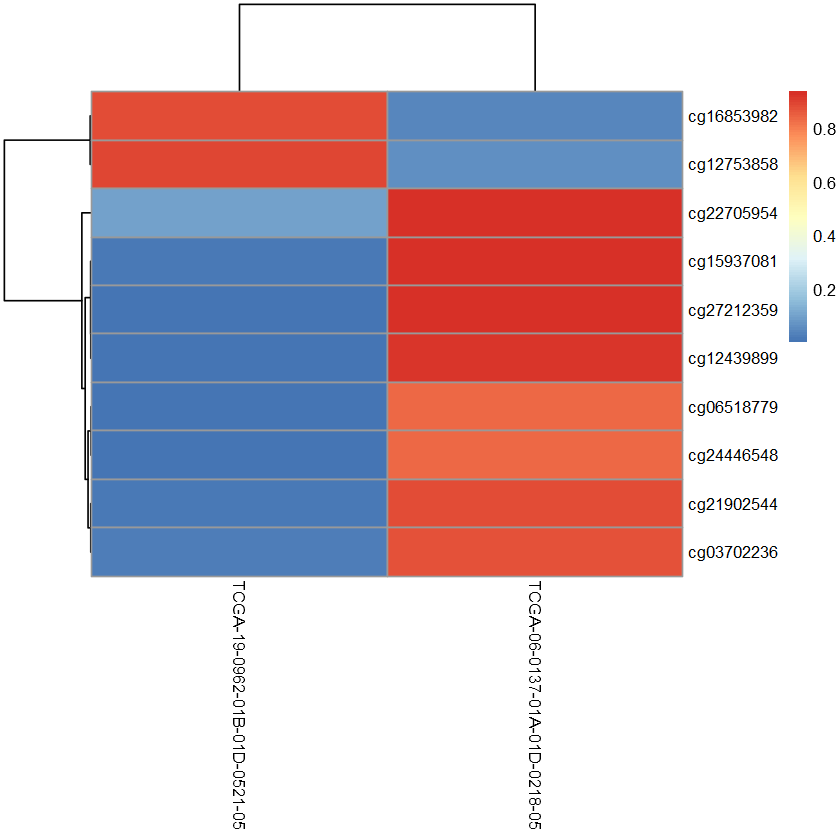

In [25]:
# plot
pheatmap(assay(dna.meth)[idx, ])

In [26]:
# download and visualize mutation data from TCGA
query_mutation <- GDCquery(project='TCGA-BRCA', data.category='Simple Nucleotide Variation', access='open')

--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-BRCA

--------------------

oo Filtering results

--------------------

ooo By access

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases

ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------



In [27]:
output_query_mutation <- getResults(query_mutation)

In [28]:
output_query_mutation

,id,data_format,cases,access,file_name,submitter_id,data_category,type,file_size,created_datetime,⋯,version,data_release,project,analysis_id,analysis_state,analysis_submitter_id,analysis_workflow_link,analysis_workflow_type,analysis_workflow_version,sample_type
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,4c544fc5-9a96-4e89-bb01-797692a48967,MAF,"TCGA-D8-A1XU-01A-11D-A14K-09,TCGA-D8-A1XU-10A-01D-A14K-09",open,1c86497b-f3a6-4bc3-a415-3cc2be22793e.wxs.aliquot_ensemble_masked.maf.gz,e7fb7a6e-bfc9-43de-bdde-6e74616733da,Simple Nucleotide Variation,masked_somatic_mutation,10685,2022-08-01T13:28:27.395708-05:00,⋯,2,35.0 - 38.0,TCGA-BRCA,1777915f-ef83-45bd-bc72-6a319b632c4c,released,1c86497b-f3a6-4bc3-a415-3cc2be22793e,https://github.com/NCI-GDC/aliquot-maf-cwl/blob/3dd621a8745ee2b91716911604bf3f096337a9b7/ensemble_aliquot_maf/ensemble_aliquot_maf_wf.cwl,Aliquot Ensemble Somatic Variant Merging and Masking,3dd621a8745ee2b91716911604bf3f096337a9b7,
2,abab6ae1-7796-4f7d-b7ed-cc6c352471d0,MAF,"TCGA-OL-A66I-01A-21D-A29N-09,TCGA-OL-A66I-10A-01D-A29N-09",open,6c7dedbe-41c3-4135-b003-867ef6a56d84.wxs.aliquot_ensemble_masked.maf.gz,784691cd-6a8e-4c9c-8c7d-06677b62a39a,Simple Nucleotide Variation,masked_somatic_mutation,17545,2022-08-01T13:36:18.539677-05:00,⋯,2,35.0 - 38.0,TCGA-BRCA,56c29dbc-5d7e-418f-96af-97c91901a12d,released,6c7dedbe-41c3-4135-b003-867ef6a56d84,https://github.com/NCI-GDC/aliquot-maf-cwl/blob/3dd621a8745ee2b91716911604bf3f096337a9b7/ensemble_aliquot_maf/ensemble_aliquot_maf_wf.cwl,Aliquot Ensemble Somatic Variant Merging and Masking,3dd621a8745ee2b91716911604bf3f096337a9b7,
3,5c6f6c12-069a-4f59-ac54-f3e8ee296905,MAF,"TCGA-A8-A07J-01A-11W-A019-09,TCGA-A8-A07J-10A-01W-A021-09",open,859998d7-7242-4b3e-a6cb-861a1c77c19a.wxs.aliquot_ensemble_masked.maf.gz,504804e7-b5b4-46c5-bf32-2470e5141c46,Simple Nucleotide Variation,masked_somatic_mutation,13781,2022-08-01T13:27:06.405355-05:00,⋯,2,35.0 - 38.0,TCGA-BRCA,6cbf81ec-22b3-43c2-a498-b46708722d9d,released,859998d7-7242-4b3e-a6cb-861a1c77c19a,https://github.com/NCI-GDC/aliquot-maf-cwl/blob/3dd621a8745ee2b91716911604bf3f096337a9b7/ensemble_aliquot_maf/ensemble_aliquot_maf_wf.cwl,Aliquot Ensemble Somatic Variant Merging and Masking,3dd621a8745ee2b91716911604bf3f096337a9b7,
4,47c98e53-098b-4445-af85-638123e3d0d0,MAF,"TCGA-A2-A0CP-01A-11W-A050-09,TCGA-A2-A0CP-10A-01W-A055-09",open,0b6cfbc2-98b6-4b95-a1a9-779461a8fb03.wxs.aliquot_ensemble_masked.maf.gz,3d7a84d8-3c5c-4292-9192-61602b169f50,Simple Nucleotide Variation,masked_somatic_mutation,14118,2022-08-01T13:15:28.517834-05:00,⋯,2,35.0 - 38.0,TCGA-BRCA,087f6bc5-95e9-43ea-b242-dbebf3107b99,released,0b6cfbc2-98b6-4b95-a1a9-779461a8fb03,https://github.com/NCI-GDC/aliquot-maf-cwl/blob/3dd621a8745ee2b91716911604bf3f096337a9b7/ensemble_aliquot_maf/ensemble_aliquot_maf_wf.cwl,Aliquot Ensemble Somatic Variant Merging and Masking,3dd621a8745ee2b91716911604bf3f096337a9b7,
5,2710faa5-6785-4d56-9f86-963558b150c3,MAF,"TCGA-BH-A0C1-01B-11D-A12B-09,TCGA-BH-A0C1-10A-01D-A12B-09",open,152a8e2c-3164-4752-8e18-8e8c38eaf396.wxs.aliquot_ensemble_masked.maf.gz,9773ccec-db75-4dc9-9c0e-eb6e0c8243eb,Simple Nucleotide Variation,masked_somatic_mutation,16924,2022-08-01T13:43:05.436122-05:00,⋯,2,35.0 - 38.0,TCGA-BRCA,344b1f37-4b34-467e-8243-f428d1ab2fbc,released,152a8e2c-3164-4752-8e18-8e8c38eaf396,https://github.com/NCI-GDC/aliquot-maf-cwl/blob/3dd621a8745ee2b91716911604bf3f096337a9b7/ensemble_aliquot_maf/ensemble_aliquot_maf_wf.cwl,Aliquot Ensemble Somatic Variant Merging and Masking,3dd621a8745ee2b91716911604bf3f096337a9b7,
6,fcf11f26-a91b-42f0-acf8-067256a48f9c,MAF,"TCGA-PL-A8LX-01A-11D-A41F-09,TCGA-PL-A8LX-10A-01D-A41F-09",open,190d78c9-00d4-489c-b8e1-9632cd8a0043.wxs.aliquot_ensemble_masked.maf.gz,ed1d4634-bcf5-41ee-9d60-359188c70595,Simple Nucleotide Variation,masked_somatic_mutation,12378,2022-08-01T13:04:26.128878-05:00,⋯,2,35.0 - 38.0,TCGA-BRCA,7f6fd598-5f92-4363-9a7c-c8a2ab5

In [2]:
query_mutation <- GDCquery(project='TCGA-BRCA',
                           data.category='Simple Nucleotide Variation',
                           access = 'open',
                           barcode = c('TCGA-LL-A73Y-01A-11D-A33E-09,TCGA-LL-A73Y-10B-01D-A33H-09',
                     'TCGA-E9-A1NH-01A-11D-A14G-09,TCGA-E9-A1NH-11A-33D-A14G-09'))

output_query_mutation <- getResults(query_mutation)

--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-BRCA

--------------------

oo Filtering results

--------------------

ooo By access

ooo By barcode

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases

ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------



In [30]:
GDCdownload(query_mutation)


GDCdownload will download 2 files. A total of 60.459 KB




Downloading: 61 kB      

In [3]:
maf <- GDCprepare(query_mutation, summarizedExperiment=TRUE)

In [4]:
maftools.input <- read.maf(maf)

-Validating
-Silent variants: 40 
-Summarizing
--Possible FLAGS among top ten genes:
  TTN
-Processing clinical data
--Missing clinical data
-Finished in 0.220s elapsed (0.160s cpu) 


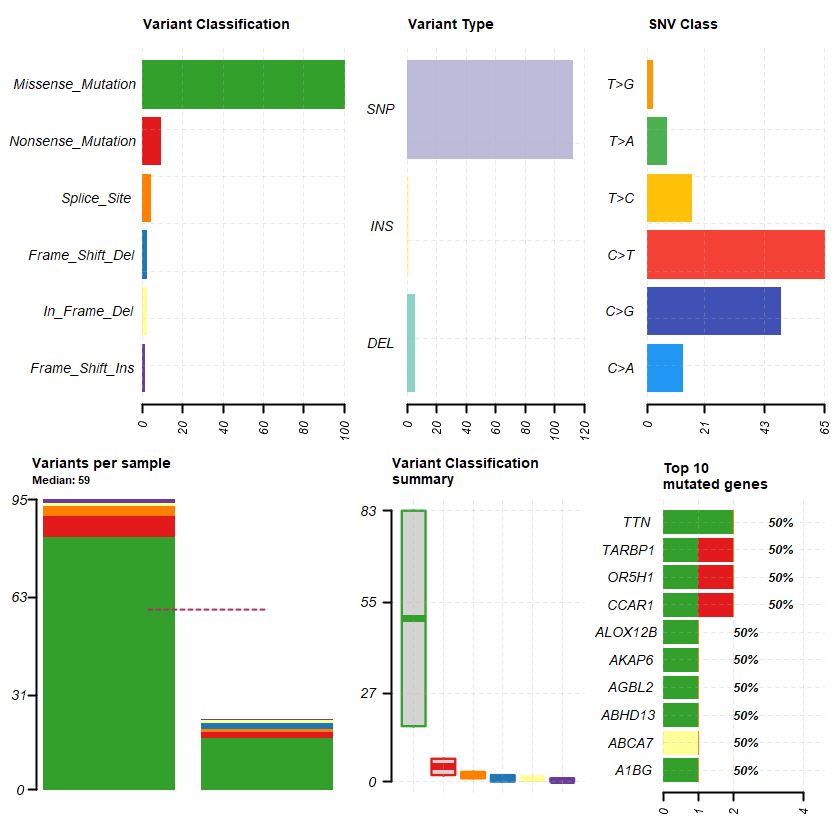

In [5]:
plotmafSummary(maf=maftools.input,
               addStat='median',
               rmOutlier=TRUE,
               dashboard=TRUE)

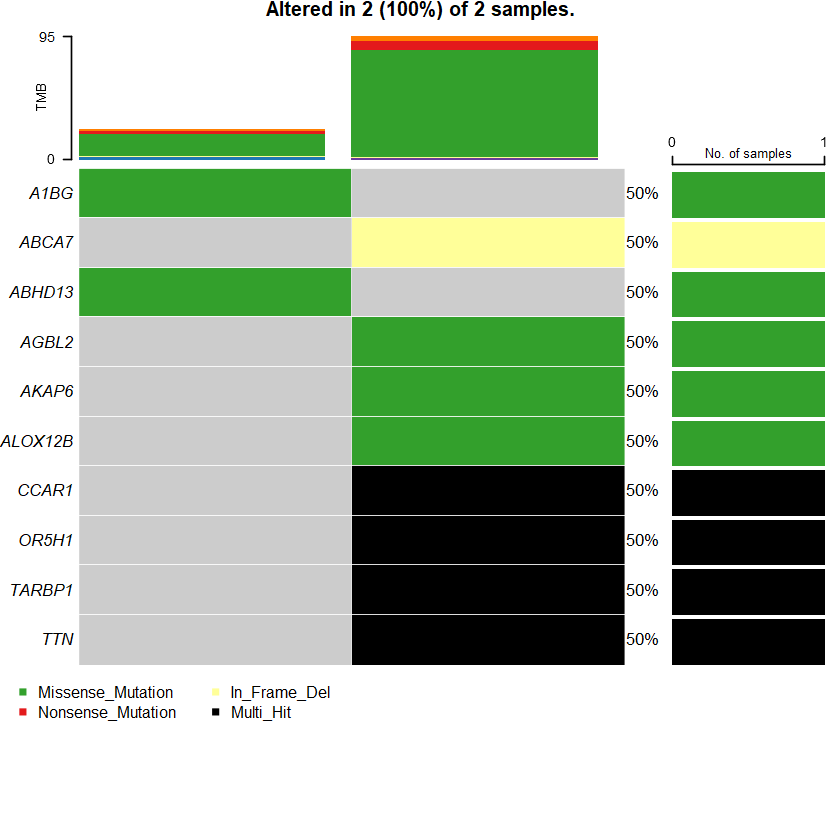

In [6]:
oncoplot(maf=maftools.input, top=10, removeNonMutated=TRUE)

- Tempo de script: 116,69 s - 4275,5 MB utilizadas

### Single-cell RNASeq integration

- harmony: https://www.nature.com/articles/s41592-019-0619-0

In [3]:
library(Seurat)
library(harmony)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, were retired in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.

Attaching SeuratObject

Carregando pacotes exigidos: Rcpp



In [4]:
integratescRNAseq <- function(){
    files <- list.files('dedif_data/')
    files <- grep('2i|Dox', files, value = TRUE)
    files <- grep('h5', files, value = TRUE)
    files <- grep('', files, value = TRUE)

    prep_integration <- function(h5_path) {
        #print(h5_path)
        day <- sub('^.*_D([^_]*)_Dox.*$', '\\1', h5_path)
        day <- sub('^.*_D([^_]*)_2i.*$', '\\1', day)
        #print(day)

        data <- Read10X_h5(paste0('dedif_data/', h5_path))

        data <- CreateSeuratObject(data, min.cells=0, min.features=300)

        ub <- quantile(data[['nFeature_RNA']]$nFeature_RNA, probs=0.97)
        data <- data[, data[['nFeature_RNA']] < ub]

        data <- NormalizeData(object = data, verbose = FALSE)
        data$day <- day
        data$Dataset <- h5_path
        return(data)
    }

    data_list <- sapply(files, prep_integration)
    data <- merge(data_list[1]$GSM3195648_D0_Dox_C1_gene_bc_mat.h5, y = data_list[2:length(data_list)])
    data <- FindVariableFeatures(object = data, nfeatures = 2000, verbose=FALSE, selection.method='vst')
    data <- ScaleData(data, verbose=FALSE)
    data <- RunPCA(data, npcs=40, verbose=FALSE)

    data <- RunHarmony(data, 'Dataset')
    data <- RunUMAP(data, reduction = 'harmony', dims = 1:40)

    data$dayint <- data[[]]$day
    data$dayint <- ifelse(data$dayint == 'iPSC', 20, data$dayint)
    data$dayint <- as.numeric(data$dayint)

    FeaturePlot(data, 'dayint')
}

mem.obj <- peakRAM(integratescRNAseq())
time_elapsed <- mem.obj$Elapsed_Time_sec
memory_used <- mem.obj$Peak_RAM_Used_MiB
print(time_elapsed)
print(memory_used)

Warning message in CheckDuplicateCellNames(object.list = objects):
"Some cell names are duplicated across objects provided. Renaming to enforce unique cell names."
Transposing data matrix

Harmony 1/10

Harmony 2/10

Harmony converged after 2 iterations

Warning message:
"Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity"
Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
18:41:58 UMAP embedding parameters a = 0.9922 b = 1.112

18:41:58 Read 18400 rows and found 40 numeric columns

18:41:58 Using Annoy for neighbor search, n_neighbors = 30

18:41:58 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   7

[1] 116.69
[1] 4275.5


In [2]:
files <- list.files('dedif_data/')
files <- grep('2i|Dox', files, value = TRUE)
files <- grep('h5', files, value = TRUE)
files <- grep('', files, value = TRUE)

In [3]:
files

[1] "GSM3195648_D0_Dox_C1_gene_bc_mat.h5"  
[2] "GSM3195650_D0.5_Dox_C1_gene_bc_mat.h5"
[3] "GSM3195652_D1_Dox_C1_gene_bc_mat.h5"  
[4] "GSM3195654_D1.5_Dox_C1_gene_bc_mat.h5"
[5] "GSM3195656_D2_Dox_C1_gene_bc_mat.h5"  
[6] "GSM3195658_D2.5_Dox_C1_gene_bc_mat.h5"
[7] "GSM3195660_D3_Dox_C1_gene_bc_mat.h5"

In [4]:
prep_integration <- function(h5_path) {
    #print(h5_path)
    day <- sub('^.*_D([^_]*)_Dox.*$', '\\1', h5_path)
    day <- sub('^.*_D([^_]*)_2i.*$', '\\1', day)
    print(day)
    
    data <- Read10X_h5(paste0('dedif_data/', h5_path))
    
    data <- CreateSeuratObject(data, min.cells=0, min.features=300)
    
    ub <- quantile(data[['nFeature_RNA']]$nFeature_RNA, probs=0.97)
    data <- data[, data[['nFeature_RNA']] < ub]
    
    data <- NormalizeData(object = data, verbose = FALSE)
    data$day <- day
    data$Dataset <- h5_path
    return(data)
}

In [5]:
data_list <- sapply(files, prep_integration)

[1] "0"
[1] "0.5"
[1] "1"
[1] "1.5"
[1] "2"
[1] "2.5"
[1] "3"


In [6]:
data <- merge(data_list[1]$GSM3195648_D0_Dox_C1_gene_bc_mat.h5, y = data_list[2:length(data_list)])

Warning message in CheckDuplicateCellNames(object.list = objects):
"Some cell names are duplicated across objects provided. Renaming to enforce unique cell names."


In [8]:
data <- FindVariableFeatures(object = data, nfeatures = 2000, verbose=FALSE, selection.method='vst')

data <- ScaleData(data, verbose=FALSE)

data <- RunPCA(data, npcs=40, verbose=FALSE)

In [9]:
start <- Sys.time()
data <- RunHarmony(data, 'Dataset')
print(Sys.time() - start)

Transposing data matrix

Harmony 1/10

Harmony 2/10

Harmony converged after 2 iterations

Warning message:
"Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity"


Time difference of 41.02818 secs


In [10]:
data <- RunUMAP(data, reduction = 'harmony', dims = 1:40)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
22:19:34 UMAP embedding parameters a = 0.9922 b = 1.112

22:19:34 Read 18400 rows and found 40 numeric columns

22:19:34 Using Annoy for neighbor search, n_neighbors = 30

22:19:34 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

22:19:38 Writing NN index file to temp file C:\Users\CS381220\AppData\Local\Temp\RtmpS0fDuv\file46103ad06e0

22:19:38 Searching Annoy index using 1 thread, search_k = 3000

22:19:48 Annoy recall = 100%

22:19:49 Commencing smooth kNN distance calibration using 1 t

In [11]:
data$dayint <- data[[]]$day
data$dayint <- ifelse(data$dayint == 'iPSC', 20, data$dayint)
data$dayint <- as.numeric(data$dayint)

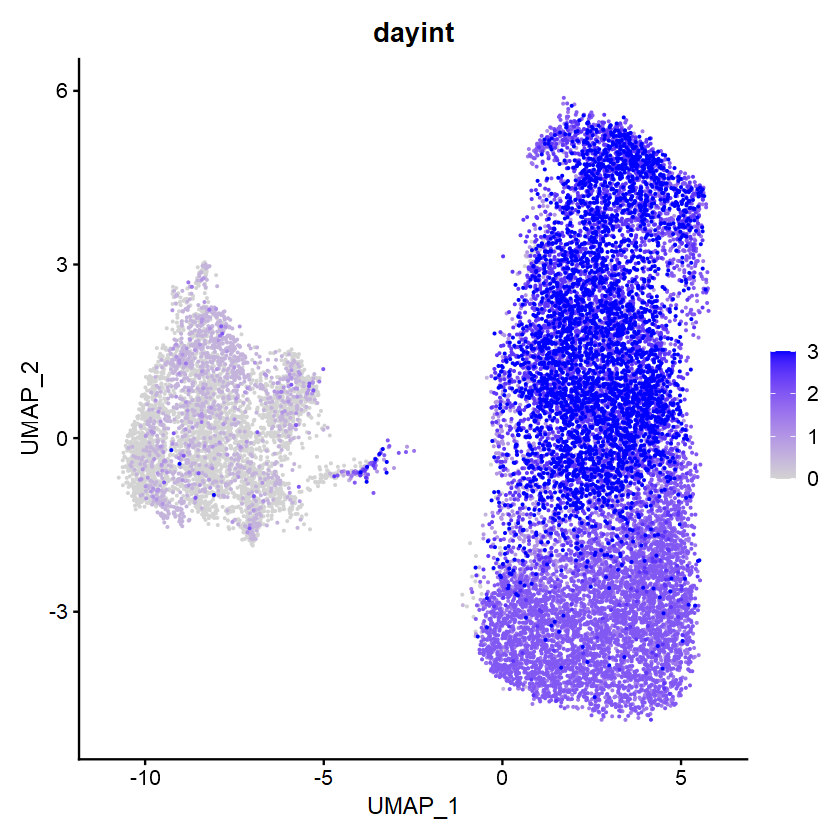

In [13]:
FeaturePlot(data, 'dayint')

### Doublet Removals
- Data availability: https://0-www-ncbi-nlm-nih-gov.brum.beds.ac.uk/geo/query/acc.cgi?acc=GSM3195648
- Doublet Finder: https://www.sciencedirect.com/science/article/pii/S2405471219300730

In [3]:
# loading libraries
library(DoubletFinder)
library(tidyverse)
library(Seurat)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, were retired in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.

Attaching SeuratObject



Centering and scaling data matrix

PC_ 1 
Positive:  Rps5, Prdx1, Fth1, Rps4x, Esd, Lgals3, Ubb, Rps19, Eef1b2, Sqstm1 
	   Mt2, Hmox1, Slc48a1, Hsp90aa1, Procr, Ftl1, Taldo1, H2afz, Blvrb, Mt1 
	   Srxn1, Rpl22l1, Mthfd2, Spp1, Hmgb2, Cxcl2, Eif4ebp1, Phgdh, Hmgb1, Cbr3 
Negative:  Thbs1, Col1a2, Col1a1, Tnc, Lox, Serpine1, Ctgf, Timp3, Flnb, Cd44 
	   Fstl1, Fn1, Col5a1, Loxl2, Actn1, Ncam1, Col4a1, Prss23, Itgb1, Wisp1 
	   Col4a2, Flna, Fbln2, Sparc, Csf1, Grem2, Col5a2, Meg3, Col12a1, Sox11 
PC_ 2 
Positive:  Meg3, Ptgs2, Procr, Inhba, Hist1h2bc, Ngf, Phlda1, F3, Ereg, Hmox1 
	   Cd44, Errfi1, Plk2, Sqstm1, Dusp10, Esd, Rps19, Pdpn, Ubc, Taldo1 
	   Cdkn1a, Cdkn1c, Ndufa4l2, Myo10, Neat1, Igf2, Prdx6, Sparc, Bsg, Srxn1 
Negative:  Birc5, Top2a, Sgol1, Prc1, 2810417H13Rik, Cenpa, Ube2c, Ccna2, Mki67, Hmgb2 
	   Fam64a, Cenpe, Cdca8, Spc25, Kif4, Cdk1, Rrm2, Cdca3, Ckap2l, Ccnb2 
	   Knstrn, Ckap2, Racgap1, Nusap1, Hmmr, Smc2, Cdc20, Anln, Pbk, Plk1 
PC_ 3 
Positive:  Acta2, Ptn, Tm

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3495
Number of edges: 122292

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7600
Number of communities: 9
Elapsed time: 0 seconds


Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
18:14:38 UMAP embedding parameters a = 0.9922 b = 1.112

18:14:38 Read 3495 rows and found 20 numeric columns

18:14:38 Using Annoy for neighbor search, n_neighbors = 30

18:14:38 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:14:38 Writing NN index file to temp file C:\Users\CS381220\AppData\Local\Temp\RtmpkZv269\file24883c1c48ce

18:14:38 Searching Annoy index using 1 thread, search_k = 3000

18:14:39 Annoy recall = 100%

18:14:40 Commencing smooth kNN distance calibration using 1 t

[1] "Creating artificial doublets for pN = 5%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."


Carregando pacotes exigidos: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009

Carregando pacotes exigidos: ROCR



NULL
[1] "Creating 1165 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."
[1] 108.59
[1] 1429.5


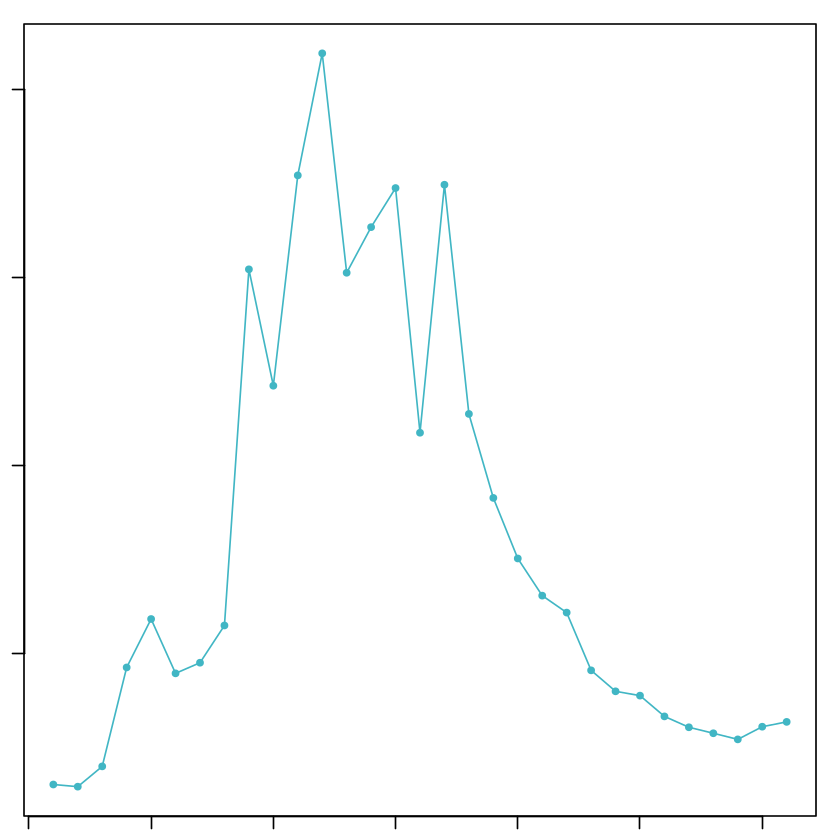

In [4]:
removeDoublets <- function () {
    # importing data
    h5_obj <- Read10X_h5('dedif_data/GSM3195648_D0_Dox_C1_gene_bc_mat.h5')
    seu.obj <- CreateSeuratObject(h5_obj)
#     str(seu.obj)

    # preprocessing: filtering
    seu.obj$mitoPercent <- PercentageFeatureSet(seu.obj, pattern='^MT-')
    seu.obj.filtered <- subset(seu.obj,
                               subset=nCount_RNA > 10 & nFeature_RNA > 200)

    # finishing preprocessing: normalizing, highly variable genes, scaling, dimensionality reduction, clustering, non-linear dimensionality reduction
    seu.obj.filtered <- NormalizeData(object = seu.obj.filtered, scale.factor = 10000)
    seu.obj.filtered <- FindVariableFeatures(object = seu.obj.filtered, nfeatures = 2000)
    seu.obj.filtered <- ScaleData(object = seu.obj.filtered)
    seu.obj.filtered <- RunPCA(object = seu.obj.filtered)
    ElbowPlot(seu.obj.filtered)
    seu.obj.filtered <- FindNeighbors(object = seu.obj.filtered, dims = 1:20)
    seu.obj.filtered <- FindClusters(object = seu.obj.filtered)
    seu.obj.filtered <- RunUMAP(object = seu.obj.filtered, dims = 1:20)

    # pK Identification (no-ground truth)
    sweep.res.list <- paramSweep_v3(seu.obj.filtered, PCs = 1:20, sct=FALSE)
    sweep.stats <- summarizeSweep(sweep.res.list, GT=FALSE)
    bcmvn_seu.obj <- find.pK(sweep.stats)

    ggplot(bcmvn_seu.obj, aes(pK, BCmetric, group = 1)) +
        geom_point() + 
        geom_line()

    # select the pK that corresponds to max bcmvn to optimize doublet detection
    pK <- bcmvn_seu.obj %>% 
        filter(BCmetric == max(BCmetric)) %>%
        select(pK)

    pK <- as.numeric(as.character(pK[[1]]))

    # Homotypic Doublet Proportion Estimate
    annotations <- seu.obj.filtered@meta.data$seurat_clusters

    homotypic.prop <- modelHomotypic(annotations)

    nExp_poi <- round(0.076*nrow(seu.obj.filtered@meta.data))
    nExp_poi.adj <- round(nExp_poi * (1 - homotypic.prop))

    # Run Doublet Finder
    seu.obj.filtered <- doubletFinder_v3(seu.obj.filtered,
                                PCs = 1:20,
                                pN = 0.25,
                                pK = pK,
                                nExp = nExp_poi,
                                reuse.pANN=FALSE,
                                sct = FALSE)
    columns <- colnames(seu.obj.filtered@meta.data)
    groupby.column <- columns[grepl(columns, pattern='DF_*')]

    # visualization
    DimPlot(seu.obj.filtered, reduction='umap', group.by=groupby.column)
    table(seu.obj.filtered@meta.data[[groupby.column]])
}

mem.obj <- peakRAM(removeDoublets())
time_elapsed <- mem.obj$Elapsed_Time_sec
memory_used <- mem.obj$Peak_RAM_Used_MiB
print(time_elapsed)
print(memory_used)

Centering and scaling data matrix

PC_ 1 
Positive:  Rps5, Prdx1, Fth1, Rps4x, Esd, Lgals3, Ubb, Rps19, Eef1b2, Sqstm1 
	   Mt2, Hmox1, Slc48a1, Hsp90aa1, Procr, Ftl1, Taldo1, H2afz, Blvrb, Mt1 
	   Srxn1, Rpl22l1, Mthfd2, Spp1, Hmgb2, Cxcl2, Eif4ebp1, Phgdh, Hmgb1, Cbr3 
Negative:  Thbs1, Col1a2, Col1a1, Tnc, Lox, Serpine1, Ctgf, Timp3, Flnb, Cd44 
	   Fstl1, Fn1, Col5a1, Loxl2, Actn1, Ncam1, Col4a1, Prss23, Itgb1, Wisp1 
	   Col4a2, Flna, Fbln2, Sparc, Csf1, Grem2, Col5a2, Meg3, Col12a1, Sox11 
PC_ 2 
Positive:  Meg3, Ptgs2, Procr, Inhba, Hist1h2bc, Ngf, Phlda1, F3, Ereg, Hmox1 
	   Cd44, Errfi1, Plk2, Sqstm1, Dusp10, Esd, Rps19, Pdpn, Ubc, Taldo1 
	   Cdkn1a, Cdkn1c, Ndufa4l2, Myo10, Neat1, Igf2, Prdx6, Sparc, Bsg, Srxn1 
Negative:  Birc5, Top2a, Sgol1, Prc1, 2810417H13Rik, Cenpa, Ube2c, Ccna2, Mki67, Hmgb2 
	   Fam64a, Cenpe, Cdca8, Spc25, Kif4, Cdk1, Rrm2, Cdca3, Ckap2l, Ccnb2 
	   Knstrn, Ckap2, Racgap1, Nusap1, Hmmr, Smc2, Cdc20, Anln, Pbk, Plk1 
PC_ 3 
Positive:  Acta2, Ptn, Tm

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3495
Number of edges: 122292

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7600
Number of communities: 9
Elapsed time: 0 seconds


Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
18:04:59 UMAP embedding parameters a = 0.9922 b = 1.112

18:04:59 Read 3495 rows and found 20 numeric columns

18:04:59 Using Annoy for neighbor search, n_neighbors = 30

18:04:59 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:05:00 Writing NN index file to temp file C:\Users\CS381220\AppData\Local\Temp\RtmpCYWE4K\file38883eed5bdc

18:05:00 Searching Annoy index using 1 thread, search_k = 3000

18:05:01 Annoy recall = 100%

18:05:01 Commencing smooth kNN distance calibration using 1 t

[1] "Creating artificial doublets for pN = 5%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."


Carregando pacotes exigidos: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009

Carregando pacotes exigidos: ROCR



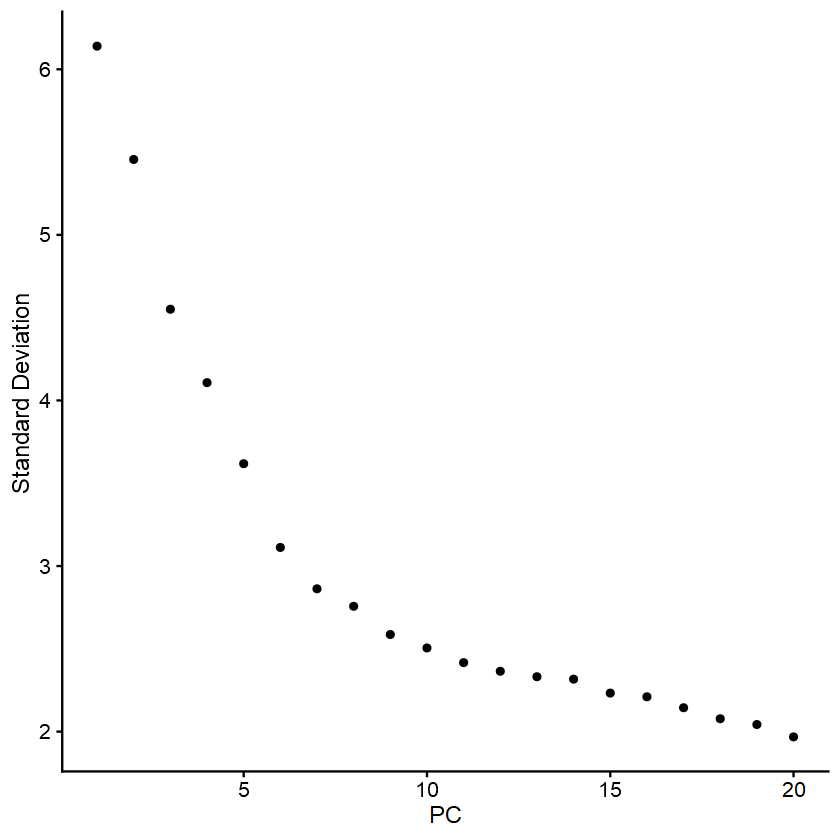

NULL


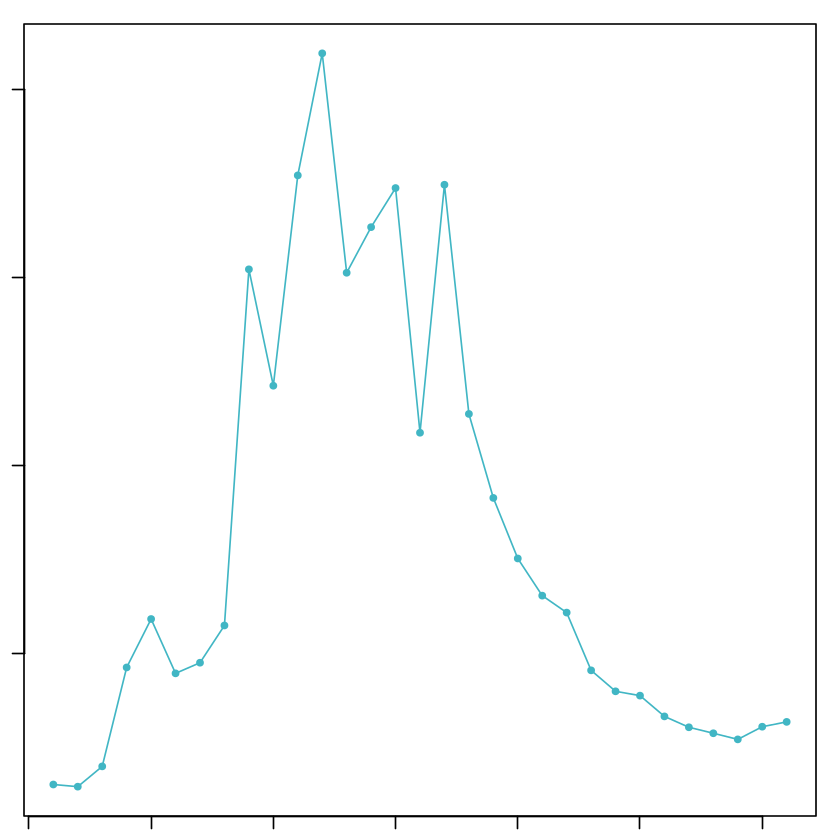

[1] "Creating 1165 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."


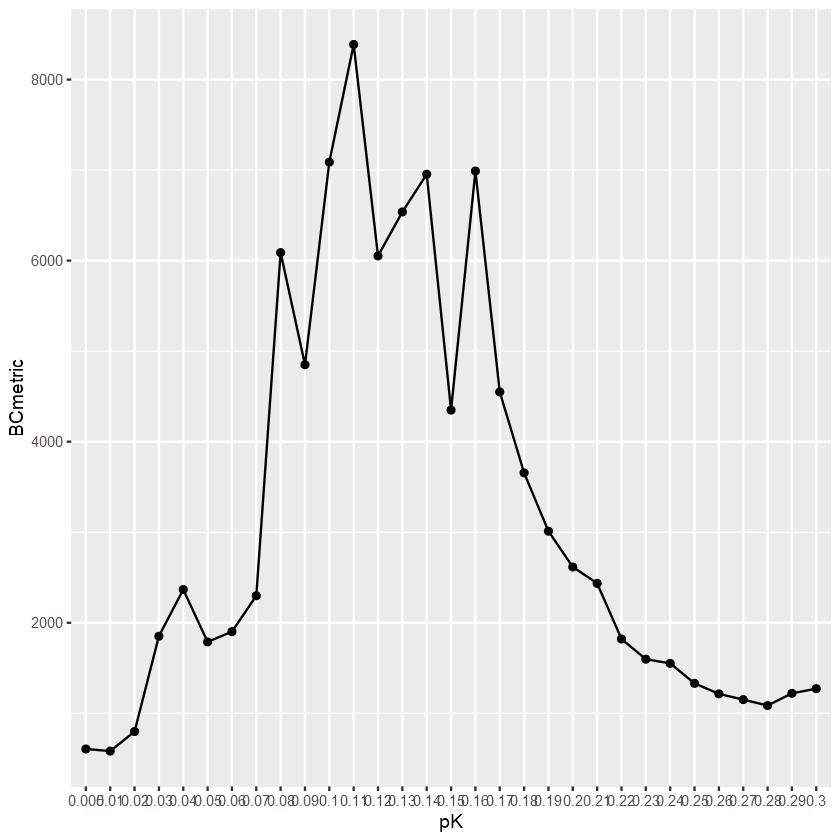

< table of extent 0 >

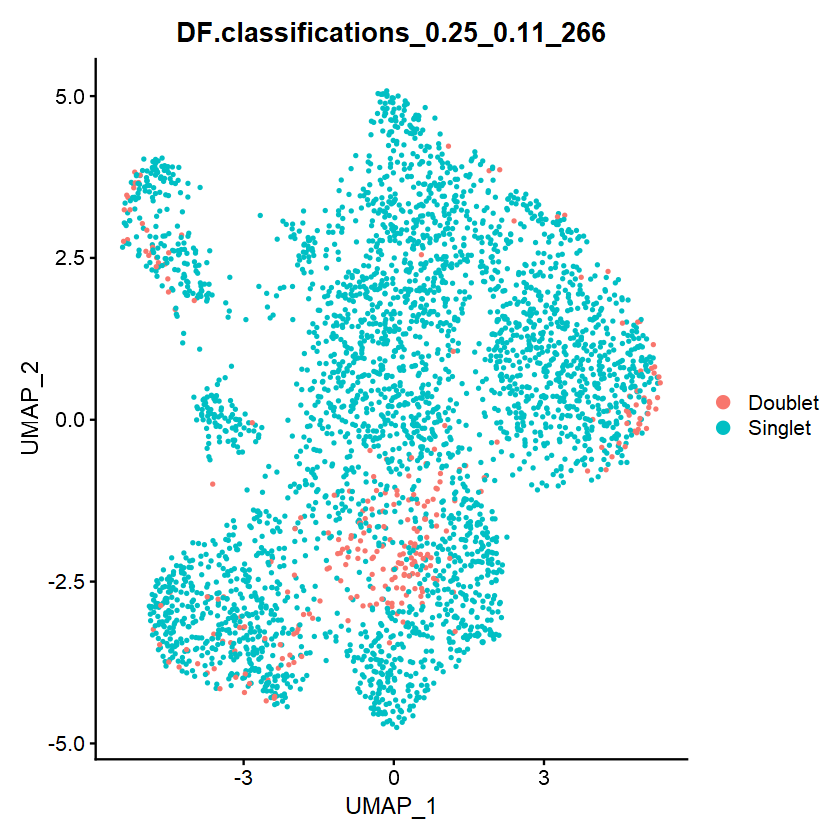

In [4]:
# importing data
h5_obj <- Read10X_h5('dedif_data/GSM3195648_D0_Dox_C1_gene_bc_mat.h5')
seu.obj <- CreateSeuratObject(h5_obj)
#     str(seu.obj)

# preprocessing: filtering
seu.obj$mitoPercent <- PercentageFeatureSet(seu.obj, pattern='^MT-')
seu.obj.filtered <- subset(seu.obj,
                           subset=nCount_RNA > 10 & nFeature_RNA > 200)

# finishing preprocessing: normalizing, highly variable genes, scaling, dimensionality reduction, clustering, non-linear dimensionality reduction
seu.obj.filtered <- NormalizeData(object = seu.obj.filtered, scale.factor = 10000)
seu.obj.filtered <- FindVariableFeatures(object = seu.obj.filtered, nfeatures = 2000)
seu.obj.filtered <- ScaleData(object = seu.obj.filtered)
seu.obj.filtered <- RunPCA(object = seu.obj.filtered)
ElbowPlot(seu.obj.filtered)
seu.obj.filtered <- FindNeighbors(object = seu.obj.filtered, dims = 1:20)
seu.obj.filtered <- FindClusters(object = seu.obj.filtered)
seu.obj.filtered <- RunUMAP(object = seu.obj.filtered, dims = 1:20)

# pK Identification (no-ground truth)
sweep.res.list <- paramSweep_v3(seu.obj.filtered, PCs = 1:20, sct=FALSE)
sweep.stats <- summarizeSweep(sweep.res.list, GT=FALSE)
bcmvn_seu.obj <- find.pK(sweep.stats)
ggplot(bcmvn_seu.obj, aes(pK, BCmetric, group = 1)) +
    geom_point() + 
    geom_line()

# select the pK that corresponds to max bcmvn to optimize doublet detection
pK <- bcmvn_seu.obj %>% 
    filter(BCmetric == max(BCmetric)) %>%
    select(pK)

pK <- as.numeric(as.character(pK[[1]]))

# Homotypic Doublet Proportion Estimate
annotations <- seu.obj.filtered@meta.data$seurat_clusters

homotypic.prop <- modelHomotypic(annotations)

nExp_poi <- round(0.076 * nrow(seu.obj.filtered@meta.data))
nExp_poi.adj <- round(nExp_poi * (1 - homotypic.prop))

# Run Doublet Finder
seu.obj.filtered <- doubletFinder_v3(seu.obj.filtered,
                            PCs = 1:20,
                            pN = 0.25,
                            pK = pK,
                            nExp = nExp_poi,
                            reuse.pANN=FALSE,
                            sct = FALSE)

columns <- colnames(seu.obj.filtered@meta.data)
groupby.column <- columns[grepl(columns, pattern='DF_*')]

# visualization
DimPlot(seu.obj.filtered, reduction='umap', group.by=groupby.column)
table(seu.obj.filtered@meta.data[[groupby.column]])